In [1]:
from os import path
from matplotlib import pyplot as plt
from utils import load_log_file

In [2]:
%matplotlib inline
plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(20,5))

In [3]:
policy_path = '/misc/vlgscratch4/LecunGroup/nvidia-collab/models_v12/policy_networks'

deterministic_name = 'MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1-seed={seed}-novalue.log'
stochastic_name = 'MPUR-policy-gauss-model=vae-zdropout=0.5-policy-gauss-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1-seed={seed}-novalue.log'

dtr_policies = list(deterministic_name.format(seed=s) for s in range(1, 3 + 1))
stc_policies = list(stochastic_name.format(seed=s) for s in range(10))

In [4]:
dtr_df = tuple(load_log_file(path.join(policy_path, policy)) for policy in dtr_policies)
stc_df = tuple(load_log_file(path.join(policy_path, policy)) for policy in stc_policies)

In [5]:
print('Available columns:', *dtr_df[0].columns)

Available columns: Step TrPrx TrLan TrUnc TrAct TrLss TePrx TeLan TeUnc TeAct TeLss


(0.16483, 0.22)

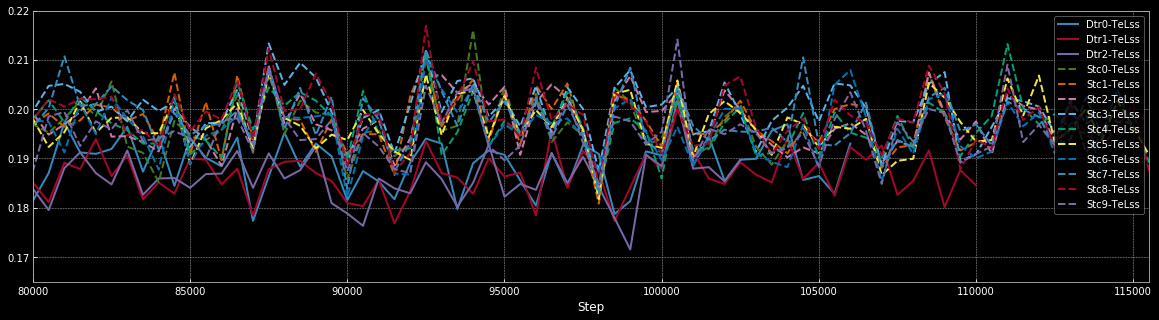

In [6]:
axis = None
items = ['TrLss', 'TeLss']
items = ['TeLss']

# Plot deterministic policy
for n, df in enumerate(dtr_df):
    labels = [f'Dtr{n}-{i}' for i in items]
    axis = df.plot(x='Step', y=items, label=labels, ax=axis)

# Plot stochastic policy
for n, df in enumerate(stc_df):
    labels = [f'Stc{n}-{i}' for i in items]
    axis = df.plot(x='Step', y=items, label=labels, ax=axis, ls='--')

# Set some plotting config
plt.xlim(left=80000)
plt.ylim(top=.22)